Sebastian Raschka, 2015  
`mlxtend`, a library of extension and helper modules for Python's data analysis and machine learning libraries

- GitHub repository: https://github.com/rasbt/mlxtend
- Documentation: http://rasbt.github.io/mlxtend/

View this page in [jupyter nbviewer](http://nbviewer.ipython.org/github/rasbt/mlxtend/blob/master/docs/sources/_ipynb_templates/regressor/linear_regression.ipynb)

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p matplotlib,numpy,scipy

Sebastian Raschka 
Last updated: 11/16/2015 

CPython 3.5.0
IPython 4.0.0

matplotlib 1.5.0
numpy 1.10.1
scipy 0.16.0


In [2]:
import sys
sys.path.insert(0, '../../../github_mlxtend/')

import mlxtend
mlxtend.__version__

'0.3.0dev'

# LinearRegression

A implementation of Ordinary Least Squares simple and multiple linear regression.

> from mlxtend.[module] import [class]

# Overview

Implementation of a linear regression model for performing ordinary least squares regression using one of the following three approaches:



### 1) Normal Equations (closed-form solution)

The closed-form solution should be preferred for "smaller" datasets where calculating (a "costly") is not a concern. For very large datasets, or datasets where the inverse of $[X^T X]$ may not exist (the matrix is non-invertible or singular, e.g., in case of perfect multicollinearity), the gradient descent or stochastic gradient descent approaches are to be preferred.

The linear function (linear regression model) is defined as:

$$y = w_0x_0 + w_1x_1 + ... + w_mx_m = \sum_{i=1}^{n} = \mathbf{w}^T\mathbf{x}$$

where $y$ is the response variable, $\mathbf{x}$ is an $m$-dimensional sample vector, and $\mathbf{w}$ is the weight vector (vector of coefficients). Note that $w_0$ represents the y-axis intercept of the model and therefore $x_0=1$.  

Using the closed-form solution (normal equation), we can compute the weights of the model as follows:

$$ \mathbf{w} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^Ty$$

### 2) Gradient Descent (GD) 

Using the gradient decent optimization algorithm, the weights are updated incrementally after each epoch (= pass over the training dataset).
The cost function $J(\cdot)$, the sum of squared errors (SSE), can be written as:

$$J(\mathbf{w}) = \frac{1}{2} \sum_i (\text{target}^{(i)} - \text{output}^{(i)})^2,  \quad \text{output} \in \mathbb{R}$$

The magnitude and direction of the weight update is computed by taking a step in the opposite direction of the cost gradient

$$\Delta w_j = -\eta \frac{\partial J}{\partial w_j},$$

where $\eta$ is the learning rate. The weights are then updated after each epoch via the following update rule:

$$\mathbf{w} := \mathbf{w} + \Delta\mathbf{w},$$

where 

$$\Delta w_j = -\eta \frac{\partial J}{\partial w_j}\\
= -\eta \sum_i (\text{target}^{(i)} - \text{output}^{(i)})(-x_{j}^{(i)})\\
= \eta \sum_i (\text{target}^{(i)} - \text{output}^{(i)})x_{j}^{(i)}$$

In [ ]:
### 3) Stochastic Gradient Descent (SGD) 

### References

- -

### Related Topics

- -

# Examples

## Example 1 - Closed Form Solution

Intercept: 0.25
Slope: 0.81


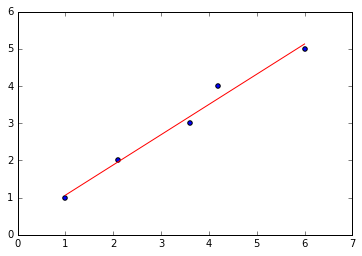

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.regressor import LinearRegression

X = np.array([ 1, 2.1, 3.6, 4.2, 6])[:, np.newaxis]
y = np.array([ 1, 2, 3, 4, 5])

ne_lr = LinearRegression(solver='normal_equation')
ne_lr.fit(X, y)

print('Intercept: %.2f' % ne_lr.w_[0])
print('Slope: %.2f' % ne_lr.w_[1])

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')    
    return

lin_regplot(X, y, ne_lr)
plt.show()

## Example 2 - Gradient Descent

Intercept: 0.25
Slope: 0.81


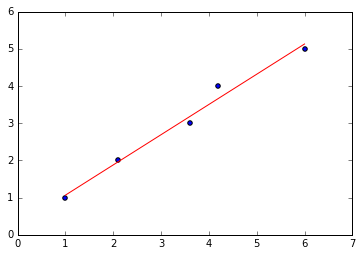

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.regressor import LinearRegression

X = np.array([ 1, 2.1, 3.6, 4.2, 6])[:, np.newaxis]
y = np.array([ 1, 2, 3, 4, 5])

gd_lr = LinearRegression(solver='gd', eta=0.005, epochs=1500, random_seed=0)
gd_lr.fit(X, y)

print('Intercept: %.2f' % gd_lr.w_[0])
print('Slope: %.2f' % gd_lr.w_[1])

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')    
    return

lin_regplot(X, y, gd_lr)
plt.show()

 **Tip**: I you are using gradient descent, consider standardizing the variables for better convergence of the algorithm.

In [19]:
PLOT CONVERGENCE

SyntaxError: invalid syntax (<ipython-input-19-f1d3d26480a0>, line 1)

# API

In [3]:
from mlxtend.classifier import Perceptron
help(Perceptron)

Help on class Perceptron in module mlxtend.classifier.perceptron:

class Perceptron(builtins.object)
 |  Perceptron classifier.
 |  
 |  Parameters
 |  ------------
 |  eta : float
 |    Learning rate (between 0.0 and 1.0)
 |  
 |  epochs : int
 |    Passes over the training dataset.
 |  
 |  random_state : int
 |    Random state for initializing random weights.
 |  
 |  zero_init_weight : bool (default: False)
 |      If True, weights are initialized to zero instead of small random
 |      numbers in the interval [0,1]
 |  
 |  Attributes
 |  -----------
 |  w_ : 1d-array
 |    Weights after fitting.
 |  
 |  cost_ : list
 |    Number of misclassifications in every epoch.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, eta=0.1, epochs=50, shuffle=False, random_seed=None, zero_init_weight=False)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  fit(self, X, y, init_weights=True)
 |      Fit training data.
 |      
 |      Parameters
 |      --------

/Users/Sebastian/miniconda3/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:
